<a href="https://colab.research.google.com/github/AndreAmorim05/data-science/blob/main/Projeto_Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças como angina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [ ]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [ ]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [ ]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

## Análise Exploratória
A análise esxploratória nos possibilita obter de forma simples um conhecimento prévio do estado do nosso *Dataset* e o que ele pode nos oferecer de interessante, a seguir veremos a estrutura de uma análise exploratória focada em gráficos, os quais podem nos apresentar de forma maus clara o sentido da análise que os valores numéricos.

### Tamanho do *DataFrame*
Pode-se dizer que a primeira análise que é importante de se realizar quando se está em frente a um *DataFrame* é ter ideia de suas dimenções (quantidade de linhas e colunas), isso nos dá uma ideia de como devemos trata-lo e se um possível algorítmo de Machine Learning possuirá dados suficientes para predizer casos com uma boa acurácia.


> Como verificado abaixo nosso *DataFrame* possui:


*   303 linhas;
*   14 colunas.





In [ ]:
df.shape

(303, 14)

### Descrição Estatística
Outro artifício importante para se obter uma visão generalizada do *DataFrame* é utilizar uma descrição estatística do mesmo. Esta análise nos permite ter informações como valores máximos e mínimos, quartis, média, mediana e desvio padrão de cada coluna.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


###Tipos das variáveis
É importante saber o tipo de cada variável para se ter noção se os valores são numéricos ou não e quais artifíceios matemáticos podem ser utilizados em cada coluna. 

In [ ]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

###Visualizando estrutura do *DataFrame*
Além das análises já realizadas podemos também ter grandes observações sobre um *DataFrame* apenas por olhar como este foi construído, a seguir serão apresentadas as primeiras 5 linhas.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Valores ausentes
Muitas vezes os *Datasets* acabam não sendo construídos de forma completa e podem apresentar dados faltantes o que pode ser um problema grande para nossas análises pois implicam em lacunas nos nossos dados, a seguir analizamos o quantitativo de dados faltantes em nosso **DF**.


> Como observado nosso **DF** possui uma ótima qualidade e não tem dados ausentes em nenhuma coluna.



In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### Doenças Cardiácas
Neste tópico iremos analizar as porcentagens de pessoas que possuem e das que não possuem doença cardíaca registrada no DataFrame

In [ ]:
pct = df.num.value_counts()/df.shape[0]
print(f'Porcentagem das pessoa com doença cardíaca ou não:\nPossui:\t\t{round(pct[1]*100,2)}%\nNão possui:\t{round(pct[0]*100, 2)}%')

Porcentagem das pessoa com doença cardíaca ou não:
Possui:		45.87%
Não possui:	54.13%


### Sexo dos pacientes
A seguir temos uma análise visual da relação do sexo dos pacientes analisados nessa pesquisa.

Text(0, 0.5, 'Quantidade')

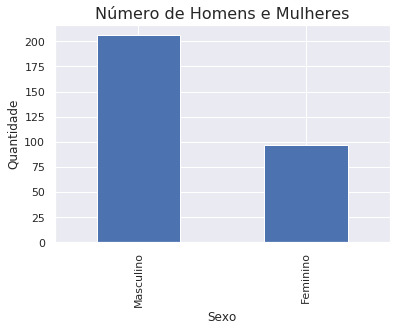

In [ ]:
fig, ax = plt.subplots()

df_sex = df.copy()
df_sex.sex = df.sex.apply(lambda x:'Feminino' if x == 0 else 'Masculino')
df_sex.sex.value_counts().plot(kind='bar', ax=ax);

ax.set_title('Número de Homens e Mulheres', fontsize=16)
ax.set_xlabel('Sexo')
ax.set_ylabel('Quantidade')


### Relação Colesterol - Idade
Como analisado no gráfico de disperção plotado, existe uma relação linear entre o avanço da idade e os níveis de colesterol, pela pouca inclinação da reta e a dispersão dos valores, notamos que a relação não é muito expressiva apesar de existir.

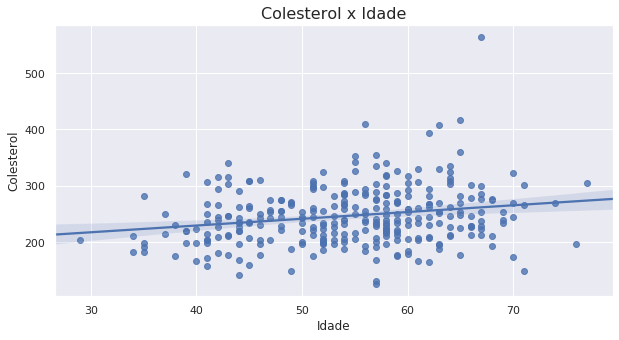

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
# df.plot.scatter(x='age', y='chol', s=10, ax=ax);
reg = sns.regplot(x='age', y='chol', data=df,  ax=ax);

ax.set_xlabel('Idade');
ax.set_ylabel('Colesterol');
ax.set_title('Colesterol x Idade', fontsize=16);

---

> Caso seja de interesse se obter a equação da reta gerada pela regressão linear, podemos utilizar o seguinte código:

---




In [ ]:
x_data = reg.get_lines()[0].get_xdata()
y_data = reg.get_lines()[0].get_ydata()

curve = np.polyfit(x=x_data, y=y_data, deg=1)

print('A curva gerada através da regressão é dada por:\n')
reta = f'{round(curve[0], 4)} X + {round(curve[1], 4)}'
print(f'{reta:^47}')

A curva gerada através da regressão é dada por:

              1.1969 X + 181.5325              


###Colesterol Sérico
O histograma nos proporciona uma visualização rápida de como os dados estão arranjados e em que proporção eles estão arranjados.
Como é notável entre 213,6 [mg/dl] e 257,4 [mg/dl] é onde está mais concentrado os individuos, contendo aproximadamente 100 pacientes apresentando essa quantidade de colesterol no sangue.

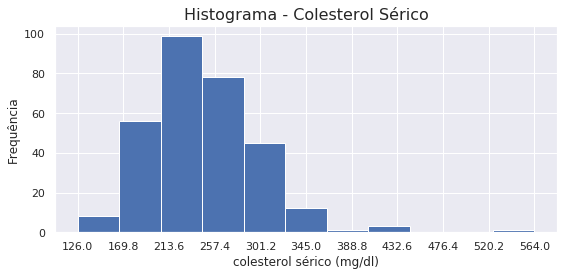

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

count, bin_edges = np.histogram(df["chol"])

df.chol.plot(kind='hist', ax=ax, density=False, bins=len(bin_edges), xticks=bin_edges);
ax.set_xlabel('colesterol sérico (mg/dl)')
ax.set_ylabel('Frequência')
ax.set_title('Histograma - Colesterol Sérico', fontsize=16)

plt.tight_layout()

###  Resultado do eletrocardiografia de repouso
O gráfico de pizza a seguir nos apresenta as frações correspondentes a cada ocorrencia citada abaixo:


  *   0: normal
  *1: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)
  *2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)




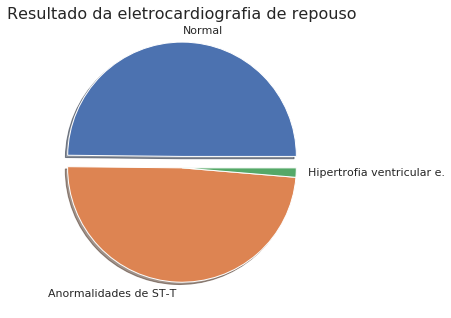

In [ ]:
count = dict(df.restecg.value_counts())
labels = ['Normal', 'Anormalidades de ST-T', 'Hipertrofia ventricular e.'] #count.keys()
values = count.values()
explode = (.1,0,0)

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(values, labels=labels, explode=explode, shadow=True);
ax.set_title('Resultado da eletrocardiografia de repouso', fontsize=16)
plt.tight_layout()

###Correlações
Abaixo será apresentado um *HeatMap* expondo as correlações existentes entre todas as colunas do *DataFrame*, onde as tonalidades mais claras apontam uma maior correlação entre os dados. 

Text(0.5, 1, 'Correlações')

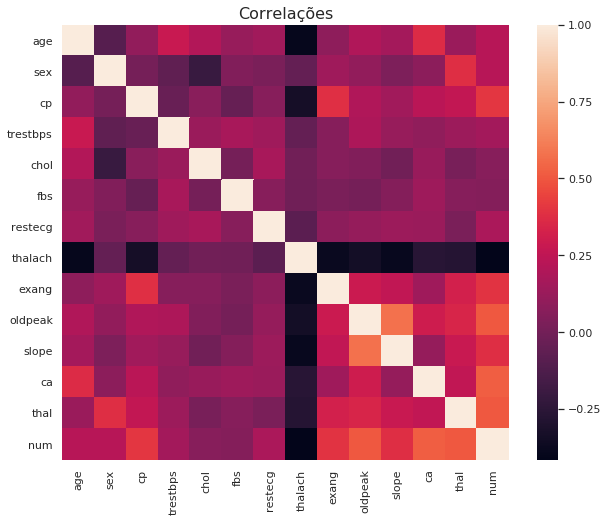

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(data=df.corr(), ax=ax);

ax.set_title('Correlações', fontsize=16)

###Tipo da dor torácica
Podemos utilizar também um gráfico de *Waffle*, este mostra a proporção dos valores, utilizaremos a coluna de tipo de dor torácica para avaliar qual é a relação de frequência dos tipos de dores acusadas pelos pacientes.

*  1: angina típica
*  2: angina atípica
*  3: dor não cardíaca
*  4: assintomática

In [ ]:
# Para se utilizar o gráfico de Waffle no Colab é necessário instalar a biblioteca 
# instalar o pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 532kB 7.7MB/s 


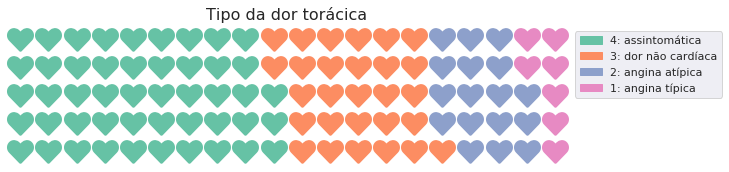

In [ ]:
# importar as bibliotecas necessárias
import matplotlib.pyplot as plt
from pywaffle import Waffle

# exemplo de Waffle
fig = plt.figure(
                FigureClass=Waffle,
                figsize=(10, 5),
                rows=5,
                columns=20,
                title={'label': 'Tipo da dor torácica', 'loc': 'center', 'fontsize':16},
                labels=['4: assintomática', '3: dor não cardíaca', '2: angina atípica', '1: angina típica'],
                values=dict(df.cp.value_counts()),
                icons='heart', icon_size=27,
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.008, 1)},
                 
                )

fig.set_tight_layout(False)
plt.show()

###Mortes por doenças cardiovasculares no Brasil
Mortes por doenças cardiovasculares são recorrentes em todo mundo, mal hpábitos halimentares e a falta de exercícios físicos regulares, além de problemas ereditarios tem sido um grande problema na vida de muitos individuos.

Através do *DataFrame* a seguir poderemos ter uma noção de como vem se comportando a quantidade de mortes ao decorrer dos anos.
 

Text(0, 0.5, 'Quantidade de mortes')

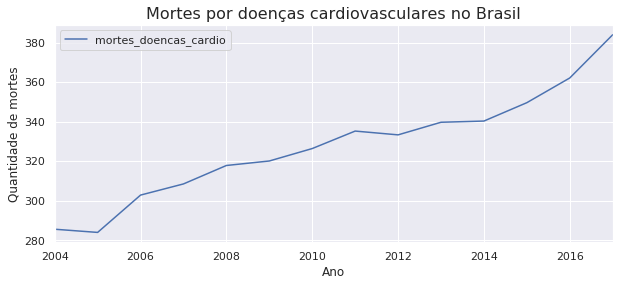

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
df_brasil.plot(x='ano',y='mortes_doencas_cardio',ax=ax);
ax.set_title('Mortes por doenças cardiovasculares no Brasil', fontsize=16)
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade de mortes')